# FASHION CLOTHES AND SHOES RECOGNITION

In [65]:
#importing tensorflow flow and calling the API keras 
#keras is used for the computer vision
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [6]:
#loading the dataset using keras API
fashion_mnist=tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'tensorflow_core.keras.datasets.fashion_mnist' from 'c:\\users\\dell\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [11]:
(X_train,X_label),(y_train,y_label)=fashion_mnist.load_data()

In [13]:
import matplotlib.pyplot as plt

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

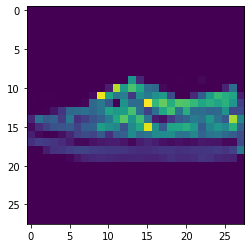

In [40]:
plt.imshow(X_train[145])
print(X_train[145])


In [39]:
print(X_label[145])

7


In [23]:
X_train=X_train/255.0
y_train=y_train/255.0

In [45]:
model=tf.keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                  keras.layers.Dense(units=512,activation=tf.nn.relu),
                                  keras.layers.Dense(10,activation=tf.nn.softmax)])

In [46]:
model.compile(optimizer=tf.optimizers.Adam(),loss="sparse_categorical_crossentropy")

In [54]:
# createing a class to use callback
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<4:
            print("\n stop traing due to low loss")
            self.model_stop_training=True  

In [55]:
callbacks=Callback()

In [56]:
model.fit(X_train,X_label,epochs=5,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
59968/60000 [============================>.] - ETA: 0s - loss: 0.2406
 stop traing due to low loss
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2405
Epoch 2/5
59712/60000 [============================>.] - ETA: 0s - loss: 0.2322
 stop traing due to low loss
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2324
Epoch 3/5
59680/60000 [============================>.] - ETA: 0s - loss: 0.2227
 stop traing due to low loss
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2228
Epoch 4/5
59680/60000 [============================>.] - ETA: 0s - loss: 0.2116
 stop traing due to low loss
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2118
Epoch 5/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.2031
 stop traing due to low loss
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2030


In [57]:
model.evaluate(y_train,y_label)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3562


0.3562196187019348

In [61]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [62]:
predictions = probability_model.predict(y_train)

In [63]:
predictions[0]

array([0.08554705, 0.08554705, 0.08554705, 0.08554705, 0.08554705,
       0.08554734, 0.08554705, 0.08702047, 0.08554705, 0.22860284],
      dtype=float32)

In [70]:
np.argmax(predictions[50])

4

In [71]:
y_label[50] # here we can see model is predicting correctly

4